# Actividades Módulo III Beatriz Gijón 


## Práctica 1: Umbralización y Máscara

Lo primero que haremos en nuestro códgio es añadir las bibliotecas con las que vamos a trabajar. 
Seguidamente, cargamos las dos imágenes que vamos a utilizar, la 'palmeras.jpg' en escala de grises y la 'flor.jpg' en color. 
Luego igualamos el tamaño de ambas imágenes, ya que necesitaremos más adelante que estas tengan el mismo tamaño. 
Para obtener el umbral, utilizamos el estilo THRESH_BINARY_INV. Luego creamos la máscara a partir del umbral, para ello tenemos que convertir nuestro umbral a HSV, así que primero convertimos el umbral a BGR y luego de BGR a HSV. 
Una vez que tenemos la máscara y que nuestras imágenes tienen el mismo tamaño, aplicamos la máscara a la imagen 'flor.jpg' con la función cv2.bitwise_and(). 
Para mostrar los resultados en la pantalla, hacemos uso de plt.subplot() y mostramos la imagen de las palmeras en escala de grises, el umbral y la imagen obtenida al aplicar la máscara sobre 'flor.jpg'. 


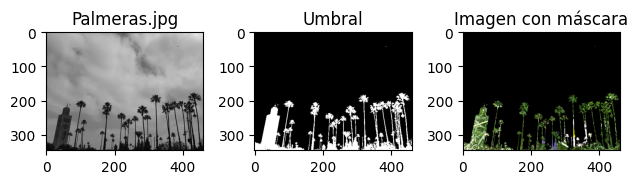

In [3]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

#Cargamos una imagen en escala de grises y otra en color
img1 = cv2.imread('palmeras.jpg',0)
img2=cv2.imread('flor.jpg',1)

#Igualamos tamaño imágenes 
x= img1.shape
y= img2.shape

if x[0] >= y[0]:
    img1 = img1[1:y[0]+1,:,:]
else:
    img2 = img2[1:x[0]+1,:,:]

if x[1] >= y[1]:
    img1 = img1[:,1:y[1]+1,:]
else:
    img2 = img2[:,1:x[1]+1,:]


#Umbralización 
R, umbral = cv2.threshold(img1,80,255,cv2.THRESH_BINARY_INV)


#Creamos máscara
img_bgr=cv2.cvtColor(umbral, cv2.COLOR_GRAY2BGR)
img_hsv=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)

lower_white = np.array([0,0,255])
upper_white = np.array([255,255,255])
    
mask = cv2.inRange(img_hsv, lower_white, upper_white)

#Aplicamos máscara a la imagen 'flor.jpg'
imagen_con_mascara = cv2.bitwise_and(img2,img2, mask= mask)


#Mostramos los resultados en la pantalla 
plt.subplot(131)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.gca().set_title('Palmeras.jpg')

plt.subplot(132)
plt.imshow(cv2.cvtColor(umbral, cv2.COLOR_BGR2RGB))
plt.gca().set_title('Umbral')

plt.subplot(133)
plt.imshow(cv2.cvtColor(imagen_con_mascara, cv2.COLOR_BGR2RGB))
plt.gca().set_title('Imagen con máscara')
plt.tight_layout() #para ajustar automáticamente las subparcelas 
plt.show()



## Práctica 2: Histograma

En esta práctica vamos a calcular el histograma de una imagen de tres formas diferentes. Primero, calcularemos el histograma utilizando matplotlib, luego utilizaremos OpenCV para calcular el histograma y matplotlib para dibujarlo y finalmente utilizaremos OpenCV para calcular el histograma de la imagen a color y matplotlib para dibujarlo. 

(array([7.6300e+02, 2.7600e+02, 2.8600e+02, 2.9600e+02, 2.9600e+02,
        3.1300e+02, 3.2500e+02, 4.1000e+02, 4.4200e+02, 5.6700e+02,
        6.6100e+02, 8.8000e+02, 1.1370e+03, 1.4990e+03, 1.6430e+03,
        1.8070e+03, 2.0210e+03, 2.0580e+03, 2.0490e+03, 2.1240e+03,
        2.8540e+03, 2.2850e+03, 2.4490e+03, 1.9770e+03, 1.5420e+03,
        1.4730e+03, 1.3760e+03, 1.3380e+03, 1.3770e+03, 1.3540e+03,
        1.3230e+03, 1.2410e+03, 1.2000e+03, 1.2090e+03, 1.1530e+03,
        1.0980e+03, 1.0240e+03, 9.9600e+02, 8.9900e+02, 9.4600e+02,
        8.5200e+02, 8.3300e+02, 8.2800e+02, 7.9900e+02, 8.0100e+02,
        7.5300e+02, 8.0800e+02, 8.0200e+02, 7.4800e+02, 7.3300e+02,
        7.2300e+02, 7.3800e+02, 7.4300e+02, 7.3400e+02, 7.1100e+02,
        7.2100e+02, 7.5100e+02, 7.5200e+02, 7.6800e+02, 7.2300e+02,
        6.9000e+02, 6.8800e+02, 7.5500e+02, 6.2900e+02, 6.5700e+02,
        6.8000e+02, 6.6500e+02, 6.2800e+02, 7.0300e+02, 7.4300e+02,
        7.7300e+02, 8.5300e+02, 8.5200e+02, 7.83

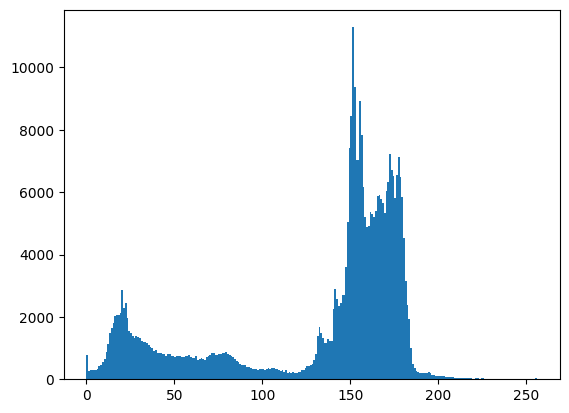

In [1]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

#Cargamos una imagen en escala de grises y otra en color
img_gris = cv2.imread('banderas.jpg',0)
img_color=cv2.imread('banderas.jpg',1)

#Usamos matplotlib para calcular el histograma 

plt.hist(img_gris.ravel(),256,[0,256])



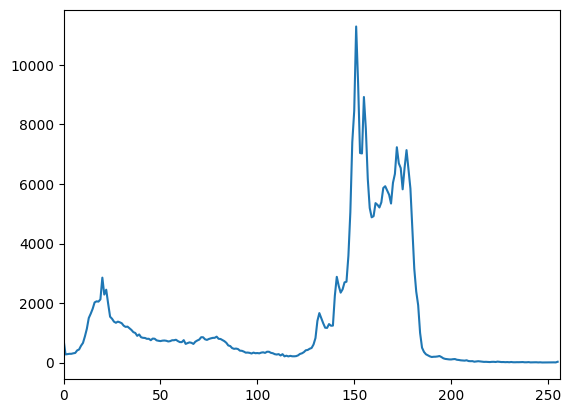

In [2]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

#Usamos OpenCV para calcular el histograma y matplotlib para dibujarlo 

histograma_grises = cv2.calcHist([img_gris],[0],None,[256],[0,256]) 
plt.plot(histograma_grises)                        
plt.xlim([0,256])
plt.show()



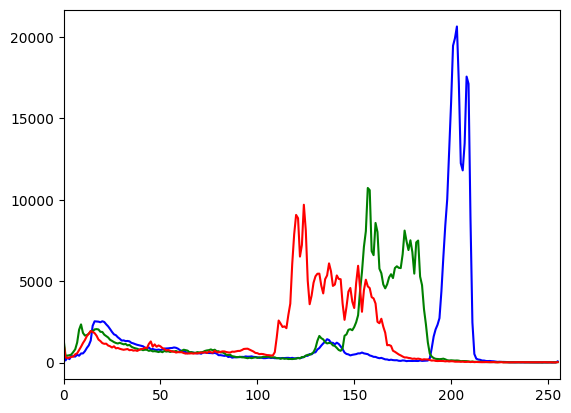

In [5]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

#Usamos OpenCV para calcular el histograma y matplotlib para dibujarlo con la imagen en color
color = ('b','g','r')
for i,col in enumerate(color):
    histograma_color = cv2.calcHist([img_color],[i],None,[256],[0,256])
    plt.plot(histograma_color,color = col)                        
    plt.xlim([0,256])
plt.show()


Cuando calculamos el histograma de la imagen, obtenemos una gráfica en la que el eje X da el valor de los píxeles y el eje Y da la frecuencia en la que dichos pixeles aparecen en nuestra imagen.
Como podemos observar, el histograma calculado con matplotlib y con OpenCV para la imagen en escala de grises nos da el mismo resultado. Cuando calculamos el histograma de la imagen a color, obtenemos una gráfica para cada color, es decir, para el azul, el verde y el rojo. 
Al analizar los histogramas, podemos deducir que los píxeles son predominantemente más brillantes. 

Para la segunda parte de la práctica, haremos el histograma de una región de la imagen. 
Cargamos la imagen en escala de grises y luego creamos una máscara que elimine parte del cielo. Para ello creamos un array del tamaño de nuestra imagen y definimos un rectángulo negro que vaya de x=0 hasta x=200 (en realidad definimos un rectángulo blanco que vaya de x=200 hasta el final). 

Mostramos la imagen original y la máscara. 
Luego aplicamos la máscara a la imagen y la mostramos también. 

Finalmente utilizamos la función cv2.calcHist() para calcular los histogramas de la imagen con y sin máscara. Expresamos ambos histogramas en una misma gráfica. El color naranja representa el histograma de la región de la imagen y el azul el histograma de la imagen entera. 

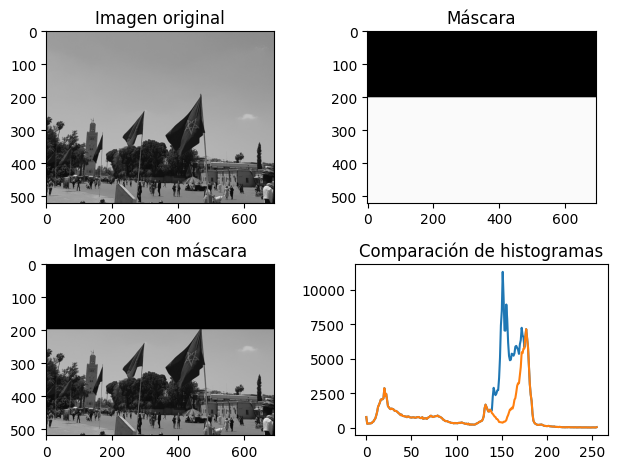

In [3]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

#Cargamos la imagen en escala de grises 
img_gris = cv2.imread('banderas.jpg',0)

#Creamos la máscara tal que se elimina parte del cielo
#Esto lo conseguimos, dibujando un rectángulo negro que vaya de x=0 hasta x=200
mascara = np.zeros(img_gris.shape[:2], np.uint8)
mascara[200:, 0:] = 250

plt.subplot(221)
plt.imshow(cv2.cvtColor(img_gris, cv2.COLOR_BGR2RGB))
plt.gca().set_title('Imagen original')

plt.subplot(222)
plt.imshow(cv2.cvtColor(mascara, cv2.COLOR_BGR2RGB))
plt.gca().set_title('Máscara')


#Imagen con mascara
imagen_mascara = cv2.bitwise_and(img_gris,img_gris,mask = mascara)
plt.subplot(223)
plt.imshow(cv2.cvtColor(imagen_mascara, cv2.COLOR_BGR2RGB))
plt.gca().set_title('Imagen con máscara')

#Calculamos histogramas con y sin máscara 
histograma_seccion = cv2.calcHist([img_gris],[0],mascara,[256],[0,256]) 

histograma_total=cv2.calcHist([img_gris],[0],None,[256],[0,256])


plt.subplot(224)
plt.plot(histograma_total, 'tab:blue') 
plt.plot(histograma_seccion, 'tab:orange')
plt.gca().set_title('Comparación de histogramas')
plt.tight_layout() #lo utilizamos para ajustar los parámetros de cada subparcela 
plt.show()





## Práctica 3: Detección de caras

En este último apartado, vamos a detectar las caras de los gatos de la imagen 'cats.jpg'. En primer lugar cargamos la imagen y la convertimos a escala de grises, luego cargamos el clasificador XML para caras de gatos y aplicamos la detección de caras de gatos a la imagen 'cats.jpg' en escala de grises. 
A continuación, utilizamos un bucle for para dibujar un rectángulo alrededor de las caras de cada gato y con el texto indicando el número de gato encontrado. Utilizaremos la imagen a color. 
Finalmente mostramos el resultado obtenido con cv2.imshow(). 

In [ ]:
import numpy as np
import cv2 


#Cargamos la imagen y la convertimos a escala de grises
img = cv2.imread('cats.jpg',1)
img_gris= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Cargamos el clasificador XML para caras de gatos
gatos_clas=cv2.CascadeClassifier('haarcascade_frontalcatface.xml')

#Aplicamos la detección de gatos a la imagen que hemos cargado antes
gatos = gatos_clas.detectMultiScale(img_gris)

#Dibujamos rectángulos en las caras de los gatos y los enumeramos 
font = cv2.FONT_HERSHEY_SIMPLEX
for (i,(x,y,w,h)) in enumerate(gatos):
  img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,100,100),2)
  cv2.putText(img, f"Gato:{i}",(x, y - 10), font, 0.5,(0,255,0),2,cv2.LINE_AA)

#Mostramos resultado obtenido 
cv2.imshow('Gatos',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

